In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
path = './Histories/'
models = ['DNN_0', 'DNN_1', 'DNN_3', 'DNN_5']
model_names = {0: 'DNN - 0',
              1: 'DNN - 1',
              2: 'DNN - 3',
              3: 'DNN - 5'}
n_models = len(models)
cv_len = 217

In [3]:
results = np.zeros(shape=(n_models, 4, cv_len, 300))

for i, model in enumerate(models):
    array_MP_max = np.load(path + model + '_MP_max_cv.npy')
    array_MP_average = np.load(path + model + '_MP_average_cv.npy')
    array_MP_dnn = np.load(path + model + '_MP_dnn_cv.npy')
    array_MP_dnn_split = np.load(path + model + '_MP_dnn_split_cv.npy')
    
    results[i, 0,:,:] = array_MP_max[:,1,:]
    results[i, 1,:,:] = array_MP_average[:,1,:]
    results[i, 2,:,:] = array_MP_dnn[:,1,:]
    results[i, 3,:,:] = array_MP_dnn_split[:,1,:]
    
np.save(path + 'overall_results.npy', results)

In [4]:
results = np.load(path + 'overall_results.npy')

## Model Accuracy History

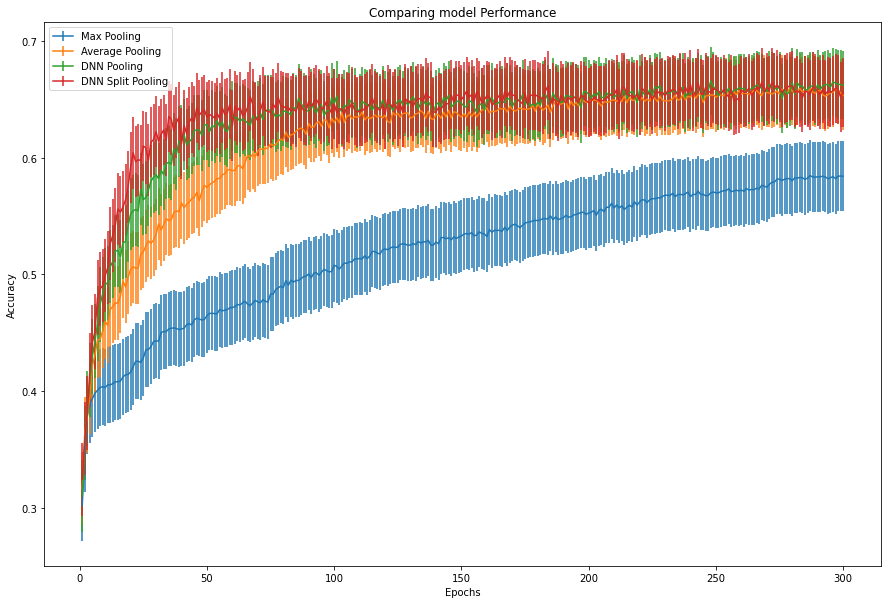

In [5]:
model_number = 3
pooling_layer = None

assert model_number is None or pooling_layer is None

epochs = np.arange(start=1, stop=301, step=1)
plt.figure(figsize=(15,10))
if model_number is None:
    standard_errors = np.std(results, axis=(0, 2))/ np.sqrt(cv_len)
    mean_accs = np.mean(results, axis=(0, 2))
    plt.errorbar(x=epochs, y=mean_accs[0], yerr=standard_errors[0], label='DNN - 0')
    plt.errorbar(x=epochs, y=mean_accs[1], yerr=standard_errors[1], label='DNN - 1')
    plt.errorbar(x=epochs, y=mean_accs[2], yerr=standard_errors[2], label='DNN - 3')
    plt.errorbar(x=epochs, y=mean_accs[3], yerr=standard_errors[3], label='DNN - 5')
else:
    standard_errors = np.std(results, axis=(1, 2))/ np.sqrt(cv_len)
    mean_accs = np.mean(results, axis=(1, 2))
    plt.errorbar(x=epochs, y=mean_accs[0], yerr=standard_errors[0], label='Max Pooling')
    plt.errorbar(x=epochs, y=mean_accs[1], yerr=standard_errors[1], label='Average Pooling')
    plt.errorbar(x=epochs, y=mean_accs[2], yerr=standard_errors[2], label='DNN Pooling')
    plt.errorbar(x=epochs, y=mean_accs[3], yerr=standard_errors[3], label='DNN Split Pooling')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Comparing model Performance')
plt.legend()

plt.show()

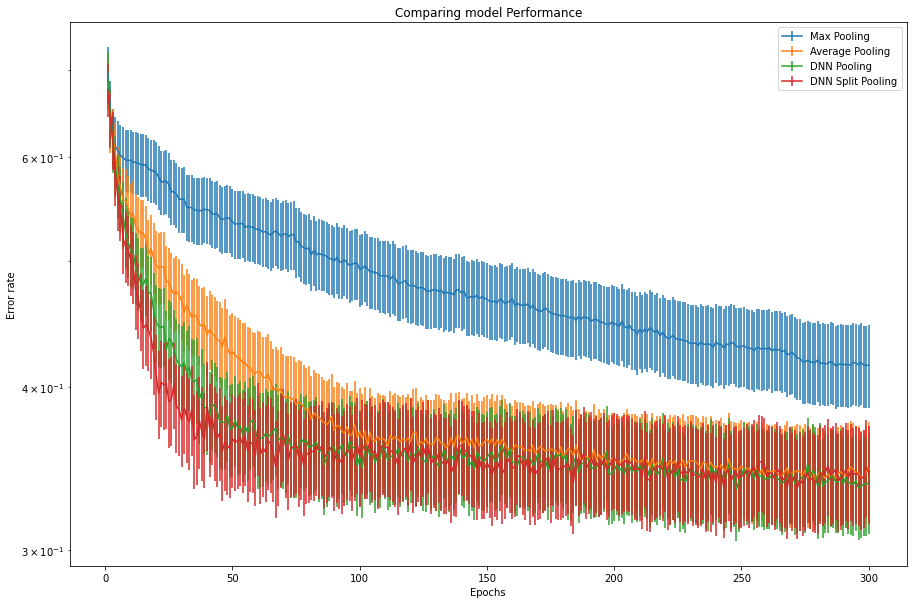

In [6]:
model_number = 2
pooling_layer = None

assert model_number is None or pooling_layer is None

epochs = np.arange(start=1, stop=301, step=1)
plt.figure(figsize=(15,10))
if model_number is None:
    standard_errors = np.std(results, axis=(0, 2))/ np.sqrt(cv_len)
    mean_accs = 1 - np.mean(results, axis=(0, 2))
    mean_accs = 1 - np.mean(results, axis=(1, 2))
    plt.errorbar(x=epochs, y=mean_accs[0], yerr=standard_errors[0], label='DNN - 0')
    plt.errorbar(x=epochs, y=mean_accs[1], yerr=standard_errors[1], label='DNN - 1')
    plt.errorbar(x=epochs, y=mean_accs[2], yerr=standard_errors[2], label='DNN - 3')
    plt.errorbar(x=epochs, y=mean_accs[3], yerr=standard_errors[3], label='DNN - 5')
else:
    standard_errors = np.std(results, axis=(1, 2))/ np.sqrt(cv_len)
    mean_accs = 1 - np.mean(results, axis=(1, 2))
    plt.errorbar(x=epochs, y=mean_accs[0], yerr=standard_errors[0], label='Max Pooling')
    plt.errorbar(x=epochs, y=mean_accs[1], yerr=standard_errors[1], label='Average Pooling')
    plt.errorbar(x=epochs, y=mean_accs[2], yerr=standard_errors[2], label='DNN Pooling')
    plt.errorbar(x=epochs, y=mean_accs[3], yerr=standard_errors[3], label='DNN Split Pooling')

plt.ylabel('Error rate')
plt.xlabel('Epochs')
plt.yscale('log')
plt.title('Comparing model Performance')
plt.legend()

plt.show()